In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import numpy as np

In [33]:
data = pd.read_csv('news.csv')
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [3]:
print('No. of observations:{}\nNo. of parameters:{}'.format(data.shape[0],data.shape[1]))

No. of observations:6335
No. of parameters:4


In [4]:
data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

Text(0.5, 1.0, 'Count of real and fake news')

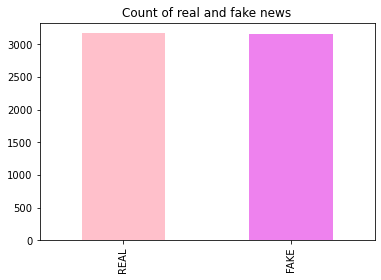

In [20]:
colours=['pink' , 'violet']
data['label'].value_counts().plot(kind='bar' , color = colours)
plt.title('Count of real and fake news')

array([<AxesSubplot:ylabel='label'>], dtype=object)

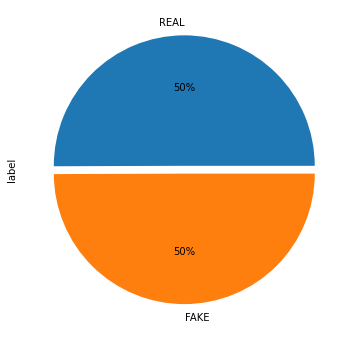

In [15]:
data['label'].value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%' ,figsize=(8,6) ,explode=(0.03, 0.03))

### Data Cleaning

In [21]:
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
stopword = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

In [34]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # removing puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization 
    text = [wn.lemmatize(word) for word in tokens]
    text = [word for word in text if word not in stopword]
    return text
data['Clean_Text'] = data['text'].apply(lambda x: clean_text(x))

In [35]:
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                          Clean_Text  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [u, secretary, state, john, f, kerry, said, mo...  
3  [, kaydee, king, kaydeeking, november, lesson,...  
4  [primary, day, new, york, frontrunners, hillar...

(-0.5, 399.5, 199.5, -0.5)

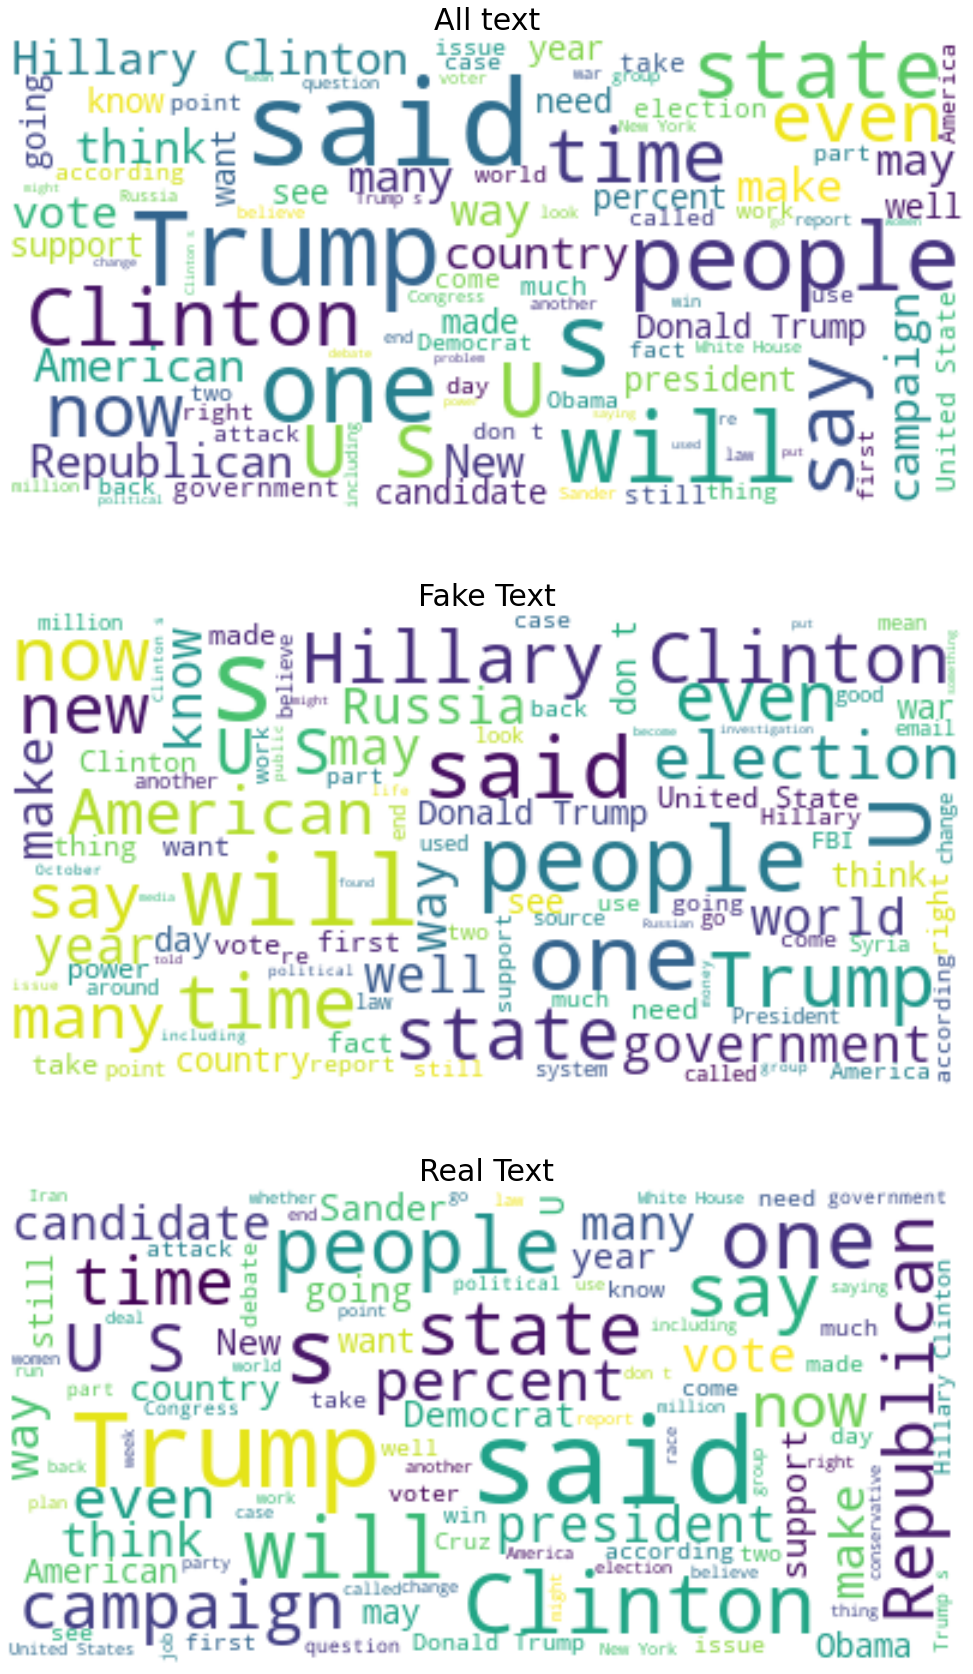

In [38]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
fake_data =  data[data['label']=='FAKE']
real_data = data[data['label'] == 'REAL']
all_text = " ".join(text for text in data.text)
fake_text = ''.join(text for text in fake_data.text)
real_text = ''.join(text for text in real_data.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
#Create and generate a word cloud image:
wordcloud_All = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_text)
wordcloud_Fake = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(fake_text)
wordcloud_Real = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(real_text)

# Display the generated image:
ax[0].imshow(wordcloud_All, interpolation='bilinear')
ax[0].set_title('All text', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Fake, interpolation='bilinear')
ax[1].set_title('Fake Text',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_Real, interpolation='bilinear')
ax[2].set_title('Real Text',fontsize=30)
ax[2].axis('off')

In [47]:
fake_data =  data[data['label']=='FAKE']
real_data = data[data['label'] == 'REAL']
real_data.head(1)

Unnamed: 0                                        title  \
2        3608  Kerry to go to Paris in gesture of sympathy   

                                                text label  \
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   

                                          Clean_Text  
2  [u, secretary, state, john, f, kerry, said, mo...

In [43]:
top = Counter([item for sublist in fake_data['Clean_Text'] for item in sublist])
temp_fake = pd.DataFrame(top.most_common(20))
temp_fake.columns = ['Common_words','count']
temp_fake.style.background_gradient(cmap='Greens')

In [46]:
fig = px.treemap(temp_fake, path=['Common_words'], values='count',title='Tree Of top 20 Words in Fake text')
fig.show()

In [48]:
top = Counter([item for sublist in real_data['Clean_Text'] for item in sublist])
temp_real = pd.DataFrame(top.most_common(20))
temp_real.columns = ['Common_words','count']
temp_real.style.background_gradient(cmap='Greens')

In [50]:
fig = px.bar(temp_real, x="count", y="Common_words", title='Commmon Words Real Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [75]:
#Getting the labels
labels=data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [76]:
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [77]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [80]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


In [88]:
#Building confusion matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[589,  49],
       [ 42, 587]], dtype=int64)

<AxesSubplot:>

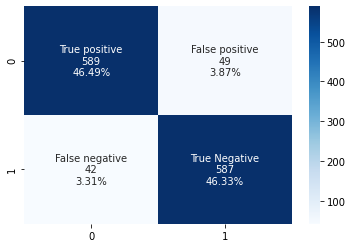

In [105]:
group_names = ['True positive' , 'False positive' , 'False negative' , 'True Negative']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

>We took a dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 92.82% in magnitude.